# Определение перспективной компьютерной игры для интернет-магазина.

**Цели и задачи исследования:**
1. Подготовить данные к анализу. 
2. Провести исследовательский анализ данных и выяснить какие платформы и жанры являются самыми популярными у пользователей.
3. Выяснить влияют ли на суммарные продажи отзывы критиков и пользователей.
4. Влияет ли рейтинг ESRB на продажи в отдельном регионе. 
5. Составить портрет пользователя каждого региона. 
6. Проверить гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные.
7. Составить выводы на основе полученных результатов. 

**Исходные данные:** из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Обзор данных и изучение общей информации, загрузка библиотек. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучив общую информацию датасета можем наблюдать следующие проблемы в данных: столбцы Name и Genre содержат по 2 пропущенных значения, также пропуски имеются в столбцах Year_of_Release, Critic_Score, User_Score и Rating. В столбце с датой релиза следует поменять тип данных с float на int.

### Замена названия столбцов. 

Выведем перечень названий столбцов нашей таблицы. Видим, что в каждом столбце присутствуют заглавные буквы, приведем их в соответствие с хорошим стилем и сделаем все символы строчными.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre',
                        'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                       'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [7]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Все столбцы приведены к змеиному регистру. Теперь приступим к преобразованию данных.

### Обработка пропусков.

In [8]:
print(len(df[df['year_of_release'].isna()]))

269


Для начала разберемся с пропусками в столбцах с датой выпуска игры, названии и жанра. Как говорилось выше, в столбцах с названием и жанром пропусков всего по 2. 269 пропусков в столбце с датой релиза это всего 1,61%, такое малое количество не повлияет на дальнейший анализ, можем смело их удалить. Пропуски в остальных столбцах заменять будет некорректно.

In [9]:
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

### Преобразование типов данных.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь можем изменить тип данных в столбце с годом выпуска игры на целочисленный методом .astype()

Взглянем на столбец с оценкой пользователей. 

In [11]:
print(df['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
9.6       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


Видим странное значение, встречающееся аж 2376 раз, необходимо его обработать. Заменить его на 0, среднее или медианное значение будет некорректно, поэтому заменим его на NaN. Также изменим тип данных в этом столбце на флоат.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

### Подсчет суммарных продаж по всем регионам. 

Теперь посчитаем суммарные продажи игр во всех регионах и добавим их в новый столбец.

In [13]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод

В ходе первоначального изучения исходной таблицы и проведения предобработки были выполнены следующие шаги: приведение названий столбцов датафрейма к нижнему регистру методом .rename, удалили пропуски в столбцах name, year_of_release, genre методом .dropna, изменили тип данных в столбце с годом выпука игры (year_of_release) с float на int с помощью .astype и добавили новый столбец с суммарными продажами каждой игры во всех регионах. Теперь наша таблица готова к дальнейшему анализу. 


## Исследовательский анализ данных 

### Количество игр, выпущенных в разные годы.

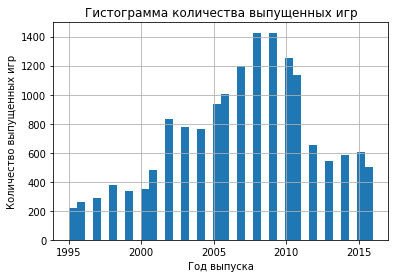

In [14]:
plt.hist(df['year_of_release'], bins='auto', range=(1995, 2016))
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистограмма количества выпущенных игр')
plt.grid(True)
plt.show;

По гистограмме количества выпущенных игр видим, что пик приходится на 2008-2009 год, в это время было выпущенно более 1400 игр. С 2012 по 2016 год выходит примерно одинаковое количество игр, значение варьируется в пределах 600.

### Платформы с наибольшими суммарными продажами. Определение актуального периода. 

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


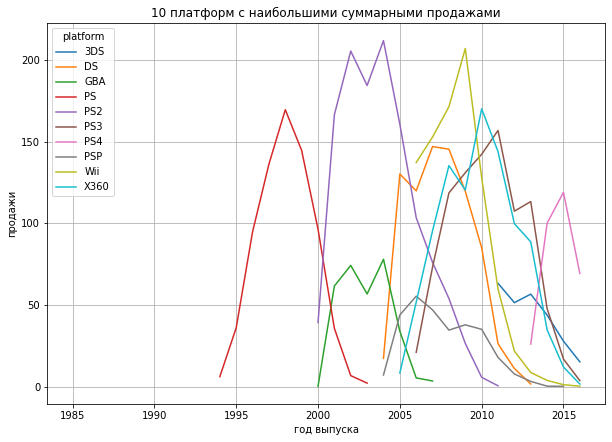

In [15]:
platforms = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
display(platforms.sort_values(by='sum_sales', ascending=False).head(10))

top10 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

top = df.query('platform in @top10').groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(
grid=True,
xlabel='год выпуска',
ylabel='продажи',
title='10 платформ с наибольшими суммарными продажами',
figsize=(10,7))

По графику видно, что срок появления и исчезновения новых платформ составляет примерно от 7 до 10 лет. Так же видим, что после 2005 года стало появляться заметно больше новых платформ в сравнении с предыдущими годами. В качестве актуального периода возьмем данные после 2013 года.

### Выбор потенциально прибыльных платформ. 

Построим таблицу для актуального периода, содержащую в себе название платформы и ее суммарные продажи.

In [16]:
actual_df = df.query('year_of_release > 2013')

actual_df_pivot = actual_df.pivot_table(
                  index='platform', 
                  values='sum_sales',
                  aggfunc='sum').sort_values(by='sum_sales', ascending=False)

display(actual_df_pivot.head(5))

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Лидером продаж по актуальному периоду является PS4, по сумме общих продаж она обгоняет своего ближайшего конкурента - Xone, более чем в 2 раза, далее в топ 5 располагаются 3DS, PS3 и X360. 

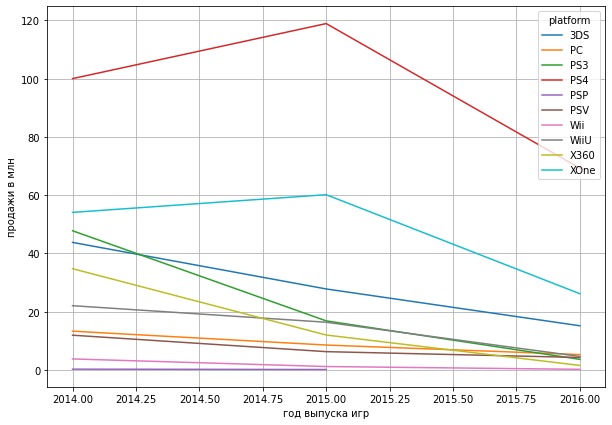

In [17]:
actual_df = df.query('year_of_release > 2013')
actual_df.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(
grid=True,
ylabel='продажи в млн',
xlabel='год выпуска игр',
figsize=(10,7));


По динамике продаж можно сказать, что у всех платформ наблюдается снижение суммарных продаж по играм. Лидер - PS4 в 2014 году продал игр на 100 млн, в 2015 году на 120 млн, далее выручка снижается до 70 млн, но стоит отметить, что данные за 2016 год могут быть неполными. У второй платформы по суммарным продажам - XOne, ситуация такая же как и у PS4: небольшое увеличение продаж к 2015 и спад далее. Стоит отметить сильный спад продаж у платформ, которые входят в топ5 по общим продажам -  PS3 и X360. Их суммарные продажи за 2 года упали примерно в 5 раз, серьезная цифра. Это связано с тем, что эти две платформы просто напросто устарели и их новые версии (PS4 и XOne) набирают обороты. Пользователи обновляют свои игровые приставки и переходят их новые поколения. 

Из этого можно сделать выводы о потенциально прибыльных платформах. Включим в список PS4 и XOne, исключим из списка устаревшие, постепенно теряющие прибыль: X360 и PS3. Также добавим в потенциально прибыльные 3DS, несмотря на снижение уровня суммарных продаж, она занимает 3 место после двух  вышеперечисленных платформ-гигантов. Отметим также PC, ее продажи не такие большие как у консольных платформ, однако она выдяляется среди остальных своей стабильностью. 

Подытожим: включим в список потенциально прибыльных платформ PS4, XOne, 3DS и PC.


Изучим детальнее эти платформы, построим "ящики с усами" по глобальным продажам игр в разбивке по платформам.

#### Платформа PS4


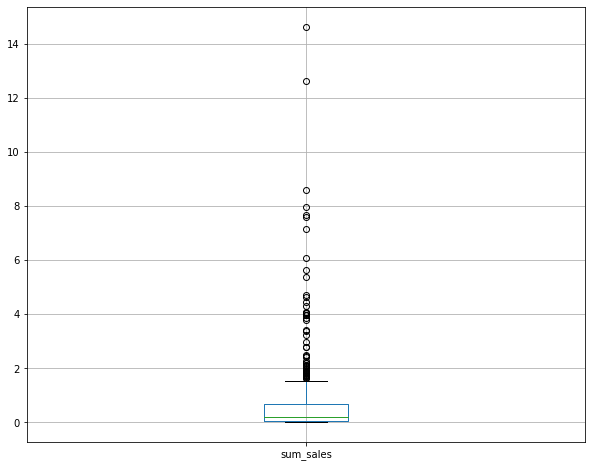

In [18]:
actual_df.query('platform == "PS4"').boxplot(column='sum_sales', figsize=(10,8));

Не очень наглядно, ограничим лимиты по оси Y. 

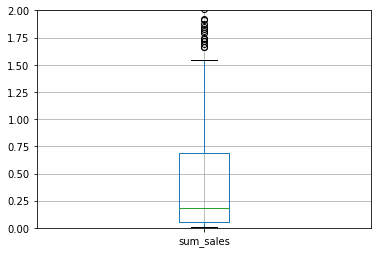

In [19]:
plt.ylim(0,2)
actual_df.query('platform == "PS4"').boxplot(column='sum_sales');

По боксплоту можем видеть, что медиана продаж игр для лидера - PS4, в районе 250 тыс. проданных копий. Все игры, проданные тиражем выше 3 квартили (около 900 тыс) можем считать выбросами, это самые успешные проекты платформы, проданные миллионы раз.

#### Платформа XOne

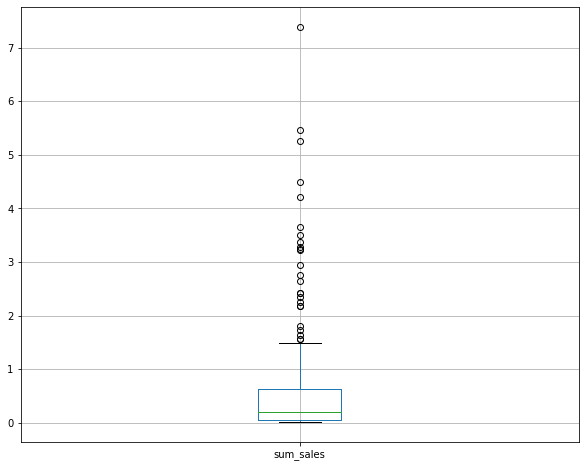

In [20]:
actual_df.query('platform == "XOne"').boxplot(column='sum_sales', figsize=(10,8));

Также ограничим ось Y для наглядности.

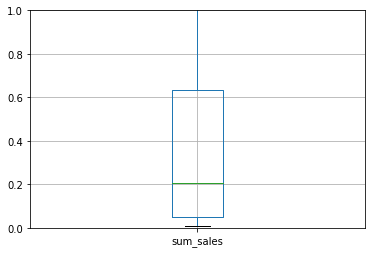

In [21]:
plt.ylim(0,1)
actual_df.query('platform == "XOne"').boxplot(column='sum_sales');

Медиана продаж Xone также находится в районе 250 тысяч, а третий квартиль в районе 900 тыс. В целом ситуация здесь такая же как в случае с платформой PS4. Стоит отметить что самые успешные проекты для этой платформы разошлись тиражем чуть более 5 млн, в то время как PS4 более 12 млн. 

#### Платформа 3DS

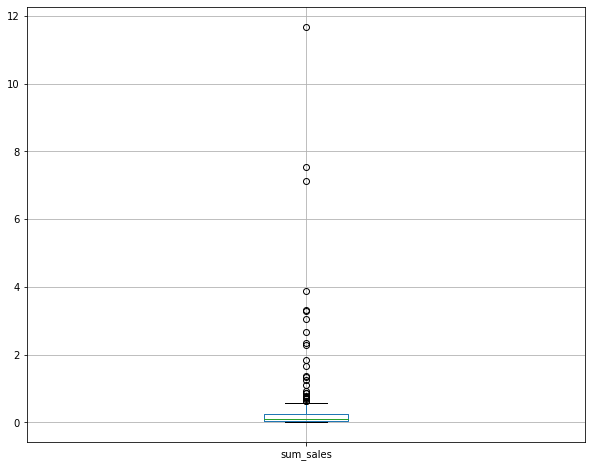

In [22]:
actual_df.query('platform == "3DS"').boxplot(column='sum_sales', figsize=(10,8));

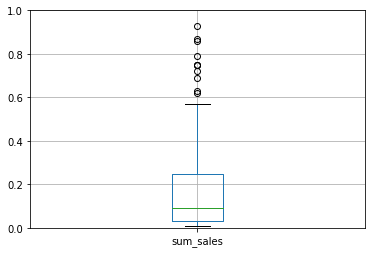

In [23]:
plt.ylim(0,1)
actual_df.query('platform == "3DS"').boxplot(column='sum_sales', figsize=(10,8));

Медиана продаж у DS3 чуть выше 200 тыс. Квартиль также чуть больше 900 тыс. Самый продаваемый проект для этой платформы разошелся тиражем почти в 4 млн. 

#### Платформа PC

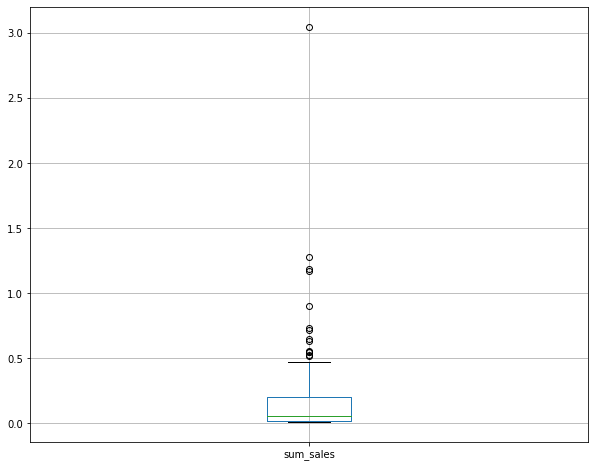

In [24]:
actual_df.query('platform == "PC"').boxplot(column='sum_sales', figsize=(10,8));

Ограничим ось Y.

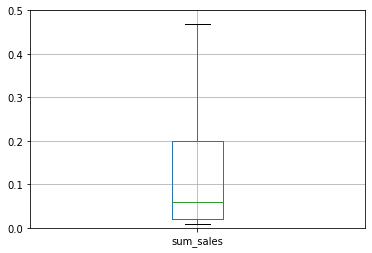

In [25]:
plt.ylim(0,0.5)
actual_df.query('platform == "PC"').boxplot(column='sum_sales', figsize=(10,8));

Медианой продаж для платформы PC находится в районе 90 тыс, а третий квартиль около 220-230 тыс. Малые показатели относительно других платформ, однако это не удивительно, учитывая малые суммарные продажи. 

### Диаграммы рассеяния, подсчет корреляции между отзывами пользователей и критиков и суммарными  продажами.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

0.5257228356581523


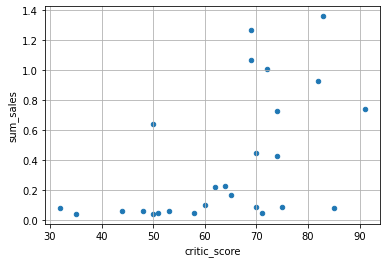

In [26]:
X360 = actual_df.query('platform =="X360"')
X360.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True);
print(X360['sum_sales'].corr(X360['critic_score']))

Построим график зависимости между отзывами критиков и продажами. Изучив его и посчитав корреляцию можем сделать вывод, что зависимость, хоть и слабая, действительно есть. 

-0.138444570945665


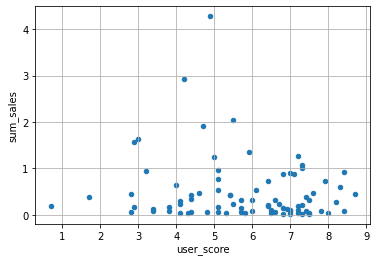

In [27]:
X360.plot(x='user_score', y='sum_sales', kind='scatter', grid=True);
print(X360['sum_sales'].corr(X360['user_score']))

Теперь взглянем на зависимость между отзывами пользователей и продажами на той же платформе. Коэффициент корелляции в -0.1 говорит нам о том, что зависимости между отзывами игроков и продажами нет. 

Сравним результаты продаж с другой платформой.

0.40266141068104083


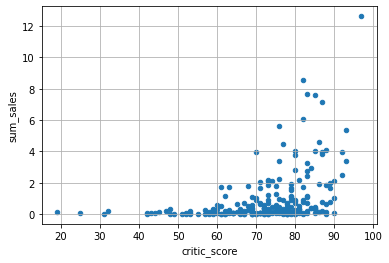

In [28]:
PS4 = actual_df.query('platform =="PS4"')
PS4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True);
print(PS4['sum_sales'].corr(PS4['critic_score']))

Примерно такая же корреляция как и в случае с платформой X360, связь есть, но не ярковыраженная.

-0.040131589472697356


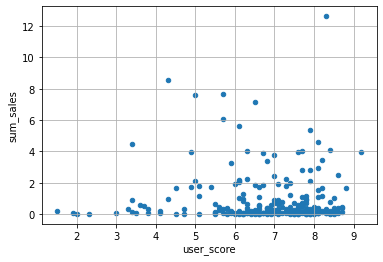

In [29]:
PS4 = actual_df.query('platform =="PS4"')
PS4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True);
print(PS4['sum_sales'].corr(PS4['user_score']))

Отрицательный коеффициент корреляции, близкий к нулю. Тут зависимости между отзывами игроков и продажами нет. 

### Определение самых прибыльных жанров.

Определим самые прибыльные жанры, для этого построим таблицу с названием жанров и их медианными продажами. Отсортируем ее в порядке убывания.

In [30]:
genres = actual_df.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
display(genres)

,sum_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Медиана была выбрана из-за того, что некоторые упешные проекты, разошедшиеся тиражем в несколько млн могут сильно искажать средние значения.

Итак, самым прибыльным жанром является Shooter, медиана продаж у игр в этом жанре - 545 тысяч, на втором месте расположился жанр  Sports (410 тысяч). Тройку лидеров закрывает Misc - 310 тыс.
Самыми низкими медианными продажами обладает Puzzle, игры в этом жанре в среднем имеют продажи в 40 тыс. 

### Вывод


В ходе исследовательского анализа мы выяснили количество игр, которые выпускались в разные годы, нашли платформы с наибольшими суммарными продажами в мире (таблица top), выявили потенциально прибыльные платформы и изучили их подробнее, построив для каждой боксплот. Определили актуальный период (после 2013 года), по которому и проводили анализ потенциально прибыльных платформ. Также были построены диаграммы рессеяния, чтобы выяснить как влияют отзывы пользователей и критиков на суммарные продажи игры. Изучив их, мы выяснили, что имеется слабая связь между отзывами критиков и продажами, в то время как отзывы игроков не влияют на суммарные продажи. Результатом определения самого прибыльного жанра стала таблица genres, лидером которой является Shooter.

## Портрет пользователя каждого региона.

### Северная Америка

Посмотрим какие платформы и жанры пользуются спросом в этом регионе, построим две таблицы и выведет топ-5 платформ/жанров.

In [31]:
platformNA = actual_df.pivot_table(index='platform',
                                   values='na_sales',
                                   aggfunc='sum').sort_values(by='na_sales', ascending=False)

genreNA = actual_df.pivot_table(index='genre',
                               values='na_sales',
                               aggfunc='median').sort_values(by='na_sales', ascending=False)
display(platformNA.head(5))
display(genreNA.head(5))

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,na_sales
genre,
Shooter,0.220
Platform,0.075
Sports,0.070
Fighting,0.040
Racing,0.030


В списке топ-5 самых популярных платформ Северной Америки ситуция похожа с общемировой, за исключением того, что X360 обогнал PS3 и занял третье место. Стоит отметить, что примерно 40% продаж всех игр у лидера - PS4, приходится именно на этот регион. Также на NA регион приходится около 60% общих продаж для платформы XOne.

Респределение игр по жанрам почти отличается от мирового, в топ 3 все те же, что и назывались ранее: Shooter, Sports, Misc. Далее идет Platform, занимающий лишь 7 место в мире и Action, который располагается в мире на 5 месте.

### Европа

In [32]:
platformEU = actual_df.pivot_table(index='platform',
                                   values='eu_sales',
                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False)

genreEU = actual_df.pivot_table(index='genre',
                               values='eu_sales',
                               aggfunc='median').sort_values(by='eu_sales', ascending=False)

display(platformEU.head(5))
display(genreEU.head(5))

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,eu_sales
genre,
Shooter,0.220
Platform,0.055
Racing,0.050
Sports,0.050
Simulation,0.030


В целом ситуация похожа на общую картину по миру. Лидирует все также PS4. Единственное изменение в топ 5 европейских платформ - появление PC вместо WiiU. 

В списке топа жанров в Европе на 3 месте появился Simulation. В остальном без изменений, Shooter лидирует с большим отрывом. 

### Япония


In [33]:
platformJP = actual_df.pivot_table(index='platform',
                                   values='jp_sales',
                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False)

genreJP = actual_df.pivot_table(index='genre',
                               values='jp_sales',
                               aggfunc='median').sort_values(by='jp_sales', ascending=False)

display(platformJP.head(5))
display(genreJP.head(5))

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Puzzle,0.03
Action,0.01
Adventure,0.01


В регионе JP видим существуенные отличия от мировых предпочтений. Здесь лидируют платформы 3DS, PS4, WiiU, PS3, PSV. Выдающийся лидер других регионов - PS4, здесь располагается на втором месте. 

Стоит отметить лидерующие жанры - Fighting, Puzzle (самый малопродаваемый в мире) и Role-Playing. 

### Другие страны


In [34]:
platform_others = actual_df.pivot_table(index='platform',
                                   values='other_sales',
                                   aggfunc='sum').sort_values(by='other_sales', ascending=False)

genre_others = actual_df.pivot_table(index='genre',
                               values='other_sales',
                               aggfunc='median').sort_values(by='other_sales', ascending=False)

display(platform_others.head(5))
display(genre_others.head(5))

,other_sales
platform,
PS4,44.48
XOne,12.52
PS3,9.37
X360,4.35
3DS,3.68


,other_sales
genre,
Shooter,0.055
Platform,0.020
Sports,0.020
Action,0.010
Fighting,0.010


В целом для других стран и по жанрам и по платформам ситуация схожа с мировой.

### Влияние рейтинга ESRB на продажи

Выясним как влияет рейтинг ESRB на продажи игр в Северной Америке.

/tmp/ipykernel_36/3638132144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df['rating'] = actual_df['rating'].fillna('Нет рейтинга')


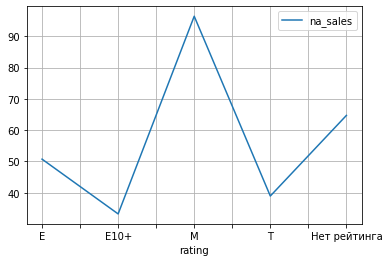

In [35]:
actual_df['rating'] = actual_df['rating'].fillna('Нет рейтинга')

actual_df.pivot_table(index='rating',
                     values='na_sales',
                     aggfunc='sum').plot(grid=True);

Лидерами продаж по возрастному рейтингу являются игры с категорией "M" -  «Mature» — «Для взрослых». Такие проекты расчитаны на аудитории 17+ лет. 

На втором месте располагаются игры с категорией "Нет рейтинга", которую мы добавили ранее для игр, у которых в поле с рейтингом был пропуск.

На третьем месте располагаются игры в жанре E". Расшифровывается «E» как «Everyone» — «Для всех»: содержание таких игр вполне подходит для возрастной категории от 6 лет.

Ненамного отстают игры в категории "T" -  «Teen» — «Подросткам»: такие игры подходят для лиц от 13 лет.

Пятое место занимают игры категории "E10+" - «Для всех от 10 лет и старше».

Теперь посмотрим на другие регионы.

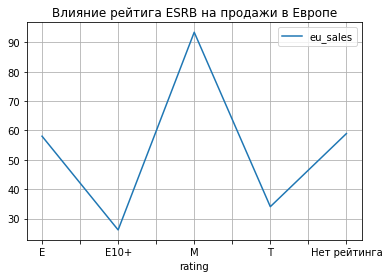

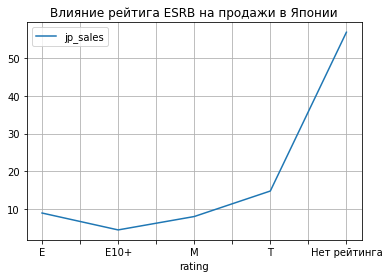

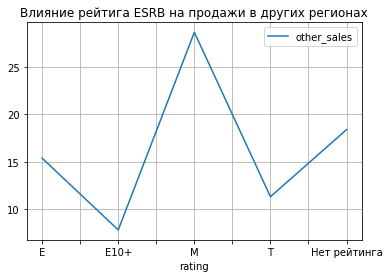

In [36]:
actual_df.pivot_table(index='rating',
                     values='eu_sales',
                     aggfunc='sum').plot(title='Влияние рейтига ESRB на продажи в Европе', grid=True);

actual_df.pivot_table(index='rating',
                     values='jp_sales',
                     aggfunc='sum').plot(title='Влияние рейтига ESRB на продажи в Японии', grid=True);

actual_df.pivot_table(index='rating',
                     values='other_sales',
                     aggfunc='sum').plot(title='Влияние рейтига ESRB на продажи в других регионах', grid=True);

В Европе и других регионах картина не сильно отличается от Северной Америки. В Японии уже поинтереснее, безоговорочным лидером здесь являются игры без рейтинга, а далее располагаются игры с категорией "Т", "М", "Е", "Е10+"

## Проверка гипотез.

Проверим две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [37]:
#для проверки гипотез удалим пропуски в столбце с рейтингом пользователей
actual_df = actual_df.dropna(subset=['user_score'])

### Гипотеза о равенстве пользовательских рейтингов друх платформ

Сформируем нулевую и альтернативную гипотезы:
- Нулевая: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [38]:
xbox = actual_df.query('platform == "XOne"')['user_score']
pc = actual_df.query('platform =="PC"')['user_score']

alpha = .05

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно имеем все основания подтвердить гипотезу о равенстве средних рейтингов пользователей XOne и PC. 


### Гипотеза о различии пользовательских рейтингов двух жанров

Сформируем нулевую и альтернативную гипотезы:

- Нулевая: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная: Средние пользовательские рейтинги жанров Action и Sports разные.

In [39]:
action = actual_df.query('genre == "Action"')['user_score']
sport = actual_df.query('genre == "Sports"')['user_score']

alpha = .05

results2 = st.ttest_ind(action, sport)
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Подтверждаем гипотезу об отличии средних рейтингов пользователей жанров Action и Sports.

## Общий вывод.

В ходе данной работы мы выполнили следующие шаги:
1. Изучили общую информацию о исходных данных.
2. Выполнили предобработку данных (изменили типы данных, разобрались с пропусками) и добавили новые данные в таблицу.
3. Определили актуальный период, за который стоит проводить дальнейший исследовательский анализ.

В результате исследовательского анализа мы выяснили:
1. Лидером продаж за актуальный период является платформа PS4;
2. Самыми популярными жанрами игр являются: Shooter, Sports и Action.
3. Существует зависимость между продажами игры и отзывами критиков, однако отзывы пользователей не влияют на итоговые продажи.

Также были составлены портреты пользователей регионов из которых мы выяснили, что американские и европейские пользователи в целом предпочитают такие же жанры и платформы, как и во всем мире, существенные отличия наблюдаются лишь в Японии. Азиатские игроки очень любят жанр Fighting. 

Также были проверены две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC подтвердилась. Гипотеза о различии пользовательских рейтингов жанров Action и Sports подтвердилась.
